# Example Usage of RCLVatlas

Lexi Jones

Last edited: 12/19/22

To run this example:
1. Download geostrophic velocity CMEMS data from 2019/09/30 - 2019/10/24
2. Setup the config.py file with the following params (default):
- grid_bounds = {
               'lon_bound_west':199.0,
               'lon_bound_east':204.0,
               'lat_bound_south':17.0,
               'lat_bound_north':22.0,
               'lag_grid_res':0.03125
               }

- sim_params = {
              'runtime':8, 
              'runtime_unit':'days',
              'timestep':20, 
              'output_freq':6,
              'backwards':'y'
              } 

- RCLV_params = {
               'min_dist':24,
               'min_area':104,
               'init_contour_step_frac':0.1,
               'convex_def_tol':0.001
               }

3. Run the following lines in the command line to simulate the Lagrangian trajectories and calculate the Lagrangian averaged vorticity deviation (LAVD)
- `python run_parcels_CMEMS.py 20191008`
- `python run_parcels_CMEMS.py 20191016`
- `python run_parcels_CMEMS.py 20191024`

At this point, you will have 3 8-day backward-in-time Lagrangian trajectories calculated for a 5x5 degree box near Hawaii. You will also have the LAVD calculated for each of these runs, which will be used to identify RCLVs. 

Stellas update-
1. activate parcels2 env
2. go into the RCLVatlas_stella path
3. 

In [1]:
import os,sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from config import *

sys.path.append('./RCLVatlas')
from subfunctions_for_RCLV_atlas import read_RCLV_CSV_untracked,read_RCLV_CSV_tracked,save_RCLV_CSV
from mainfunctions_for_RCLV_atlas import *

Set up date list

In [2]:
dates = [filename[0:8] for filename in os.listdir(LAVD_dir)]
date_list = np.sort(np.unique(dates)).tolist()[::-1] #Reverse the order because we will iterate from the latest date to the earliest
date_list

['20020315']

Preview LAVD output

In [3]:
LAVD_output_file_path = LAVD_dir + date_list[0] + '_LAVD_' + filename_str + '.npy'
LAVD = np.load(LAVD_output_file_path)
LAVD = np.ma.masked_where(np.isnan(LAVD),LAVD) #Land mask required for the peak_local_max function to work
LAVD_reshape = np.transpose(np.reshape(LAVD,(len(traj_lon_array),len(traj_lat_array))))

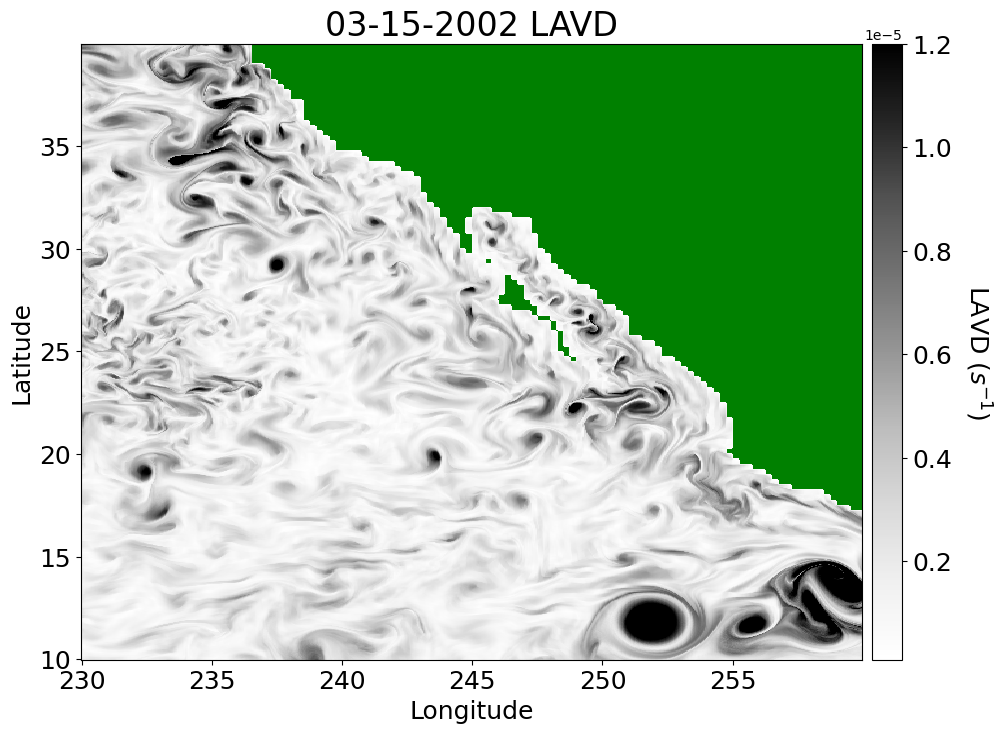

In [4]:
fontsize = 18

fig,ax = plt.subplots(1,1,figsize=(12,8))
ax.set_facecolor("g")
plot = ax.pcolormesh(traj_lon_array,traj_lat_array,LAVD_reshape,shading='nearest',cmap='Greys',vmin=10**(-7), vmax=1.2*(10**(-5)));

cbar = plt.colorbar(plot, pad = 0.01)
cbar.ax.tick_params(labelsize=18)
cbar.ax.get_yaxis().labelpad = 30
cbar.ax.set_ylabel('LAVD $(s^{-1})$', rotation=270, fontsize=fontsize)
    
ax.set_xlabel('Longitude',fontsize=fontsize)
ax.set_ylabel('Latitude',fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.set_title('%s-%s-%s LAVD'%(date_list[0][4:6],date_list[0][6:8],date_list[0][0:4]),fontsize=24)

plt.show()

Identify RCLVs

IN SUBFUNCTIONS.PY I ADDED INLINES 56-59 THE -1 AFTER THE TIME INDEX BC OTHERWISE IT WAS NOT WORKING ~!!! KEEP THAT IN MIND `




In [5]:
RCLV_data = np.array(set_up_RCLV_atlas(date_list),dtype=object) 
print('Length of RCLV_data: %s'%(len(RCLV_data)))
save_RCLV_CSV(RCLV_data,'%sRCLV_%s_%s_untracked.csv'%(RCLV_dir,date_list[-1],date_list[0])) #save RCLV as CSV

Identifying RCLVs...
20020315


/home/b/b382618/.conda/envs/parcels2/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/b/b382618/.conda/envs/parcels2/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


(115,)
(360000, 40)
0
0
(115,)
(360000, 40)
10
40
(115,)
(360000, 40)
1
4
(2145,)
(360000, 40)
0
0
(2145,)
(360000, 40)
10
40
(2145,)
(360000, 40)
1
4
(360,)
(360000, 40)
0
0
(360,)
(360000, 40)
10
40
(360,)
(360000, 40)
1
4
(254,)
(360000, 40)
0
0
(254,)
(360000, 40)
10
40
(254,)
(360000, 40)
1
4
(138,)
(360000, 40)
0
0
(138,)
(360000, 40)
10
40
(138,)
(360000, 40)
1
4
(289,)
(360000, 40)
0
0
(289,)
(360000, 40)
10
40
(289,)
(360000, 40)
1
4
(216,)
(360000, 40)
0
0
(216,)
(360000, 40)
10
40
(216,)
(360000, 40)
1
4
Length of RCLV_data: 8


In [8]:
# lag_traj_dir = './lag_trajs/'
# initial_date = 20020315

In [6]:
# traj= xr.open_dataset("/scratch/b/b382618/lang_eddies/lag_traj/20020315_10days_runtime_20min_timestep_particle_start_lat_10.0_40.0_lon_230.0_260.0_spatial_step_0.05_6hr_output_freq.zarr")


/home/b/b382618/.conda/envs/parcels2/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/b/b382618/.conda/envs/parcels2/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


In [7]:
# traj.time.values

array([['2002-03-15T00:00:00.000000000', '2002-03-14T18:00:00.000000000',
        '2002-03-14T12:00:00.000000000', ...,
        '2002-03-05T18:00:00.000000000', '2002-03-05T12:00:00.000000000',
        '2002-03-05T06:00:00.000000000'],
       ['2002-03-15T00:00:00.000000000', '2002-03-14T18:00:00.000000000',
        '2002-03-14T12:00:00.000000000', ...,
        '2002-03-05T18:00:00.000000000', '2002-03-05T12:00:00.000000000',
        '2002-03-05T06:00:00.000000000'],
       ['2002-03-15T00:00:00.000000000', '2002-03-14T18:00:00.000000000',
        '2002-03-14T12:00:00.000000000', ...,
        '2002-03-05T18:00:00.000000000', '2002-03-05T12:00:00.000000000',
        '2002-03-05T06:00:00.000000000'],
       ...,
       ['2002-03-15T00:00:00.000000000', '2002-03-14T18:00:00.000000000',
        '2002-03-14T12:00:00.000000000', ...,
        '2002-03-05T18:00:00.000000000', '2002-03-05T12:00:00.000000000',
        '2002-03-05T06:00:00.000000000'],
       ['2002-03-15T00:00:00.000000000', '20

In [6]:
# sim_params={'runtime': 10, 'runtime_unit': 'days', 'timestep': 20, 'output_freq': 6, 'backwards': 'y'}

In [ ]:
# def extract_particles_after_time(traj,x_mask,y_mask,traj_lat_array,sim_params,days):
#     """
#     Get the lat/lons of particles from a ploygon after some number of days along the Lagrangian trajectory.
    
#     Input
#         traj: trajectory file 
#         x_mask,y_mask: indeces from the longitude & latitude arrays that are inside of the polygon
#         days: number of days from the initialization time to retreive particle locations (back trajectories will be back in time)
#     Output
#         eddy_xdays_lons,eddy_xday_lats: lon/lat coordinates of the particles of interest on day x
    
#     """
#     particle_lon,particle_lat,particle_vort = traj.variables["lon"],traj.variables["lat"],traj.variables["vort"] #read in particle location lat, lons, vorts
#     particle_nums = x_mask*len(traj_lat_array) + y_mask #formula to get the integer ID of the particles inside a polygon
#     print(particle_nums.shape)
#     print(particle_lon.shape)
#     print(sim_params)
    
#     eddy_xday_lons = [float(particle_lon[p,int((24/sim_params['output_freq'])*days)]) for p in particle_nums]   
#     eddy_xday_lats = [float(particle_lat[p,int((24/sim_params['output_freq'])*days)]) for p in particle_nums]
#     eddy_xday_vorts = [float(particle_vort[p,int((24/sim_params['output_freq'])*days)]) for p in particle_nums]
#     return eddy_xday_lons,eddy_xday_lats,eddy_xday_vorts

In [8]:
# ## Stella- now that I have correct lavd fields I will try to use texas guys xlcs 
# # rclv id methods
# sys.path.append("/home/b/b382618/xlcs_stella1/xlcs/")

# import lagrangian_tools as lt
# import grid_calc
# # from custommap import *
# from contours import extract_contours

In [9]:
# # parameters
# defTol = 0.075  # [%] control the deficiency of the loop closer to 0 means perfectly convex (no filamentation)
# max_radius = 3  # degree (so ~300 km)

# # try extracting contours around each identified peaks
# # number_levels represents the number of "test" contour between [0, peak_lavd_value]
# number_levels = 50
# peaks_xy, peaks_contour = extract_contours(LAVD_reshape, defTol, max_radius, number_levels)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [7]:
print(RCLV_data[1]) # header
# print(RCLV_data[1]) # example RCLV 

['20020315', nan, 'cyc', nan, np.float64(3620.1271403249175), np.float64(248.8500000000043), np.float64(22.200000000000173), np.float64(0.02048298772271419), 0, np.float64(249.15000000000435), np.float64(22.500000000000178), np.float64(249.20000000000437), np.float64(22.500000000000178), np.float64(249.25000000000438), np.float64(22.450000000000177), np.float64(249.25000000000438), np.float64(22.450000000000177), np.float64(249.3000000000044), np.float64(22.400000000000176), np.float64(249.3000000000044), np.float64(22.400000000000176), np.float64(249.3500000000044), np.float64(22.350000000000176), np.float64(249.3500000000044), np.float64(22.300000000000175), np.float64(249.3500000000044), np.float64(22.300000000000175), np.float64(249.3500000000044), np.float64(22.250000000000174), np.float64(249.3500000000044), np.float64(22.200000000000173), np.float64(249.3500000000044), np.float64(22.200000000000173), np.float64(249.3000000000044), np.float64(22.150000000000173), np.float64(249.3

In [14]:


ax.set_xlabel('Longitude',fontsize=fontsize)
ax.set_ylabel('Latitude',fontsize=fontsize)


fontsize = 18

fig,ax = plt.subplots(1,1,figsize=(12,8))
ax.set_facecolor("g")
plot = ax.pcolormesh(traj_lon_array,traj_lat_array,LAVD_reshape,shading='nearest',cmap='Greys',vmin=10**(-7), vmax=1.2*(10**(-5)));

cbar = plt.colorbar(plot, pad = 0.01)
cbar.ax.tick_params(labelsize=18)
cbar.ax.get_yaxis().labelpad = 30
cbar.ax.set_ylabel('LAVD $(s^{-1})$', rotation=270, fontsize=fontsize)
    
ax.set_xlabel('Longitude',fontsize=fontsize)
ax.set_ylabel('Latitude',fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.set_title('%s-%s-%s LAVD'%(date_list[0][4:6],date_list[0][6:8],date_list[0][0:4]),fontsize=24)

for i in np.arange(0,len(RCLV_bnds)):
    x_bnds = [float(coord) for coord in RCLV_bnds[i][0::2]]
    y_bnds = [float(coord) for coord in RCLV_bnds[i][1::2]]

    if RCLV_orientations[i] == 'anti':
        color = '#FF0000'
    else:
        color = '#4242FF'
    ax.plot(x_bnds,y_bnds,linewidth=2,c=color)

plt.show()
    




'Date'

Track RCLVs through time

In [8]:
RCLV_data = np.array(read_RCLV_CSV_untracked('%sRCLV_%s_%s_untracked.csv'%(RCLV_dir,date_list[-1],date_list[0]),1),dtype=object)
RCLV_data = track_and_ID_RCLVs(RCLV_data,date_list)
save_RCLV_CSV(RCLV_data,'%sRCLV_%s_%s_tracked_with_ID.csv'%(RCLV_dir,date_list[-1],date_list[0])) # Save the tracked data as a CSV

Tracking eddies through time & IDing...
Number of identical contours to remove: 0
20020315


FileNotFoundError: [Errno 2] No such file or directory: '/scratch/b/b382618/lang_eddies/lag_traj/20020315_10days_runtime_20min_timestep_particle_start_lat_10.0_40.0_lon_230.0_260.0_spatial_step_0.05_6hr_output_freq.nc'

QC skip step

In [8]:
log_file = open('%sRCLV_%s_%s_log_file.txt'%(RCLV_dir,date_list[-1],date_list[0]),'a')
RCLV_data = read_RCLV_CSV_tracked('%sRCLV_%s_%s_tracked_with_ID.csv'%(RCLV_dir,date_list[-1],date_list[0]))    
RCLV_data = interpolate_skipped_contours(RCLV_data,log_file,date_list)
save_RCLV_CSV(RCLV_data,'%sRCLV_%s_%s_skips_interpolated.csv'%(RCLV_dir,date_list[-1],date_list[0]))

Checking if any RCLVs skipped a date...


./RCLVatlas/mainfunctions_for_RCLV_atlas.py:309: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  RCLV_data_no_header = np.array(RCLV_data)[1:]


Age the contours

In [9]:
RCLV_data = read_RCLV_CSV_tracked('%sRCLV_%s_%s_skips_interpolated.csv'%(RCLV_dir,date_list[-1],date_list[0]))
RCLV_data = age_RCLVs(RCLV_data)
save_RCLV_CSV(RCLV_data,'%sRCLV_%s_%s_atlas.csv'%(RCLV_dir,date_list[-1],date_list[0])) # Save the final dataset
RCLV_data = np.array(RCLV_data,dtype=object)

Giving RCLVs an age & saving the final atlas...


In [9]:
for r in RCLV_data:
    print(r[0:9])

['Date', 'RCLV ID', 'Orientation', 'Age (days)', 'Area (km^2)', 'Center Lon', 'Center Lat', 'CD', 'flag']
['20020315', nan, 'cyc', nan, 3620.1271403249175, 248.8500000000043, 22.200000000000173, 0.02048298772271419, 0.0]
['20020315', nan, 'anti', nan, 66259.70425711511, 251.75000000000495, 11.800000000000026, 0.006442773012660142, 0.0]
['20020315', nan, 'anti', nan, 11603.617204165508, 255.80000000000587, 11.700000000000024, 0.009171045977870981, 0.0]
['20020315', nan, 'cyc', nan, 7334.256112193487, 237.5000000000017, 29.200000000000273, 0.027313563025161896, 0.0]
['20020315', nan, 'cyc', nan, 4496.291367026718, 243.6000000000031, 19.90000000000014, 0.02081920503903519, 0.0]
['20020315', nan, 'cyc', nan, 8894.195452202302, 232.55000000000058, 19.10000000000013, 0.019649049644352923, 0.0]
['20020315', nan, 'anti', nan, 6805.251913948225, 237.80000000000177, 18.45000000000012, 0.01917918345283157, 0.0]


Overlay the RCLVs on the LAVD fields

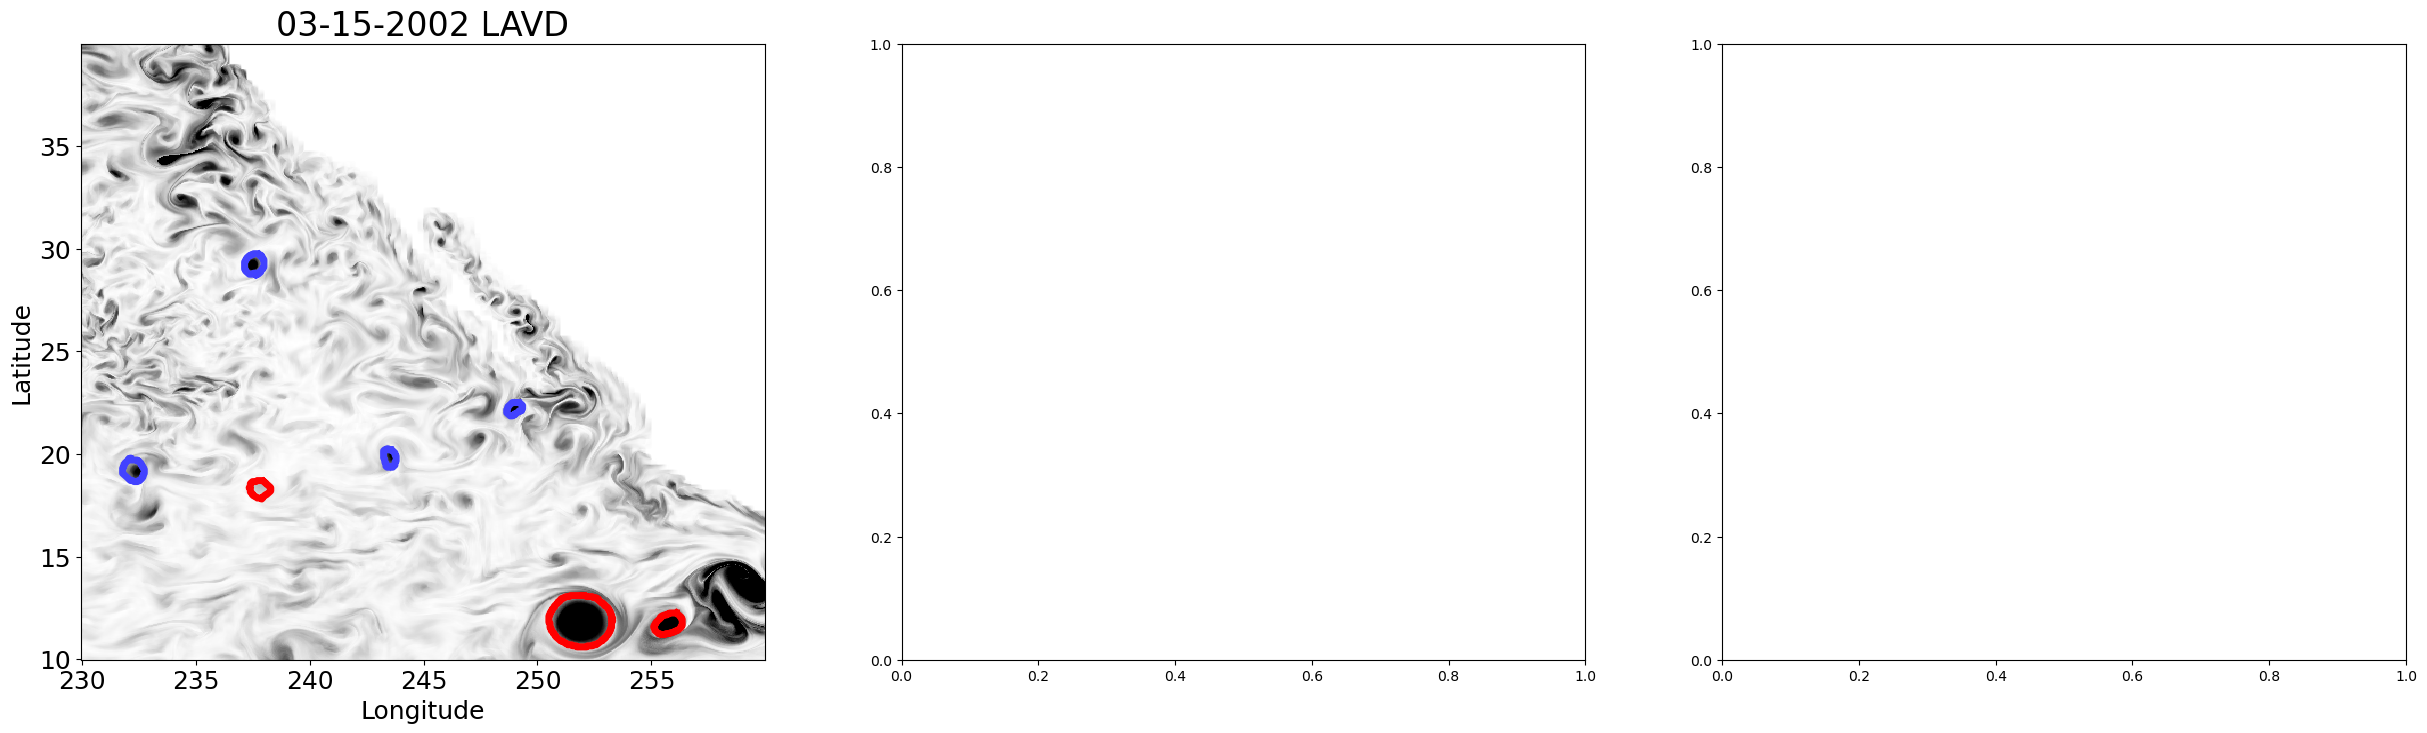

In [10]:
fontsize = 18
fig,ax = plt.subplots(1,3,figsize=(30,8))

ax[0].set_xlabel('Longitude',fontsize=fontsize)
ax[0].set_ylabel('Latitude',fontsize=fontsize)

c = 0
for date in date_list:
    # Load the LAVD data
    LAVD_output_file_path = LAVD_dir + date + '_LAVD_' + filename_str + '.npy'
    LAVD = np.load(LAVD_output_file_path)
    LAVD = np.ma.masked_where(np.isnan(LAVD),LAVD) #Land mask required for the peak_local_max function to work
    LAVD_reshape = np.transpose(np.reshape(LAVD,(len(traj_lon_array),len(traj_lat_array))))
    
    # Plot the LAVD 
    plot = ax[c].pcolormesh(traj_lon_array,traj_lat_array,LAVD_reshape,shading='nearest',cmap='Greys',vmin=10**(-7), vmax=1.2*(10**(-5)));
    ax[c].tick_params(axis='both', which='major', labelsize=fontsize)
    ax[c].set_title('%s-%s-%s LAVD'%(date[4:6],date[6:8],date[0:4]),fontsize=24)

    # Plot the RCLVs for the given date
    RCLV_data_this_day = RCLV_data[np.where([r[0]==date for r in RCLV_data])[0]]
    RCLV_bnds = [r[9:] for r in RCLV_data_this_day] # boundary coordinates
    RCLV_orientations = [r[2] for r in RCLV_data_this_day] # eddy polarity
    
    for i in np.arange(0,len(RCLV_bnds)):
        x_bnds = [float(coord) for coord in RCLV_bnds[i][0::2]]
        y_bnds = [float(coord) for coord in RCLV_bnds[i][1::2]]

        if RCLV_orientations[i] == 'anti':
            color = '#FF0000'
        else:
            color = '#4242FF'
        ax[c].plot(x_bnds,y_bnds,linewidth=5,c=color)
    c += 1

plt.show()

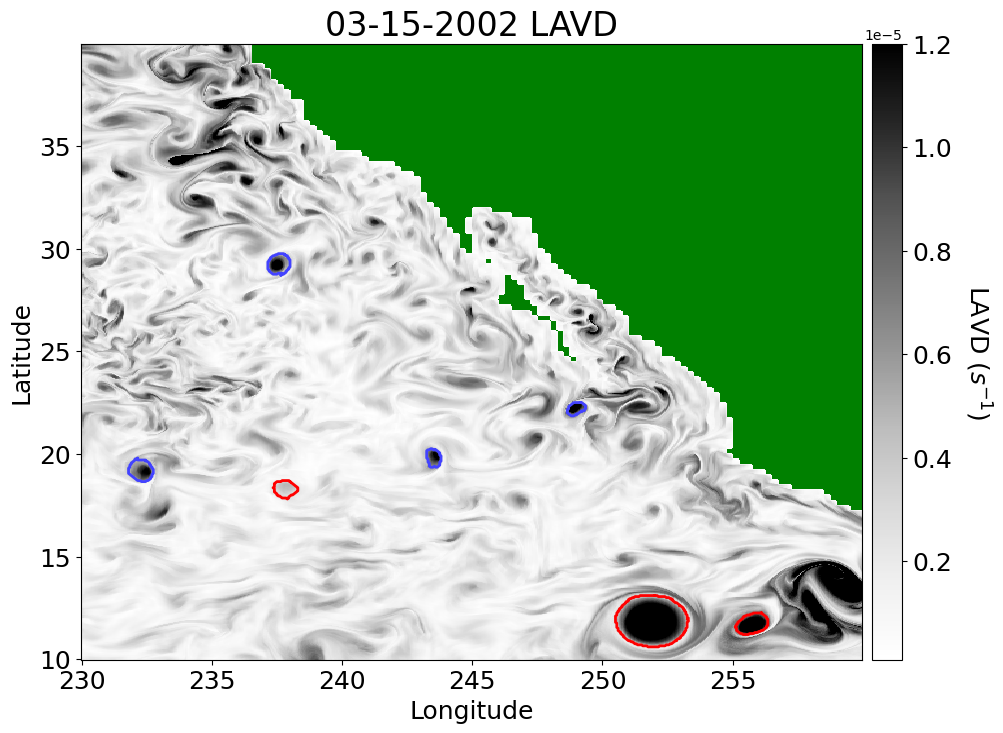

In [16]:


ax.set_xlabel('Longitude',fontsize=fontsize)
ax.set_ylabel('Latitude',fontsize=fontsize)


fontsize = 18

fig,ax = plt.subplots(1,1,figsize=(12,8))
ax.set_facecolor("g")
plot = ax.pcolormesh(traj_lon_array,traj_lat_array,LAVD_reshape,shading='nearest',cmap='Greys',vmin=10**(-7), vmax=1.2*(10**(-5)));

cbar = plt.colorbar(plot, pad = 0.01)
cbar.ax.tick_params(labelsize=18)
cbar.ax.get_yaxis().labelpad = 30
cbar.ax.set_ylabel('LAVD $(s^{-1})$', rotation=270, fontsize=fontsize)
    
ax.set_xlabel('Longitude',fontsize=fontsize)
ax.set_ylabel('Latitude',fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.set_title('%s-%s-%s LAVD'%(date_list[0][4:6],date_list[0][6:8],date_list[0][0:4]),fontsize=24)

for i in np.arange(0,len(RCLV_bnds)):
    x_bnds = [float(coord) for coord in RCLV_bnds[i][0::2]]
    y_bnds = [float(coord) for coord in RCLV_bnds[i][1::2]]

    if RCLV_orientations[i] == 'anti':
        color = '#FF0000'
    else:
        color = '#4242FF'
    ax.plot(x_bnds,y_bnds,linewidth=2,c=color)

plt.show()
    




Color by RCLV age

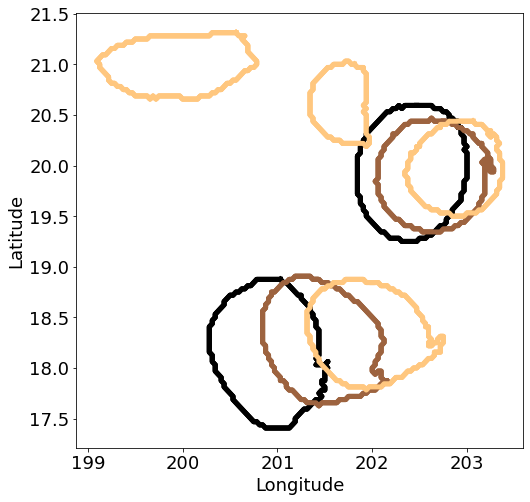

In [12]:
RCLV_bnds = [r[9:] for r in RCLV_data[1:]] # boundary coordinates
RCLV_ages = [r[3] for r in RCLV_data[1:]] # ages
norm = colors.Normalize(vmin=min(RCLV_ages), vmax=max(RCLV_ages))

fontsize = 18
fig,ax = plt.subplots(1,1,figsize=(8,8))

for date in date_list:
    for i in np.arange(0,len(RCLV_bnds)):
        x_bnds = [float(coord) for coord in RCLV_bnds[i][0::2]]
        y_bnds = [float(coord) for coord in RCLV_bnds[i][1::2]]
        ax.plot(x_bnds,y_bnds,linewidth=5,c=plt.cm.copper_r(norm(RCLV_ages[i])))
            
ax.set_xlabel('Longitude',fontsize=fontsize)
ax.set_ylabel('Latitude',fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)

plt.show()